Digital Signal Processing Tutorial

$(382.047 / 64 / 66 / 67 / 68 / 69 / 70), 20245$

Matthias Wagner, Bernhard Plaimer

Assignment 3

Sampling and Reconstruction

Information about assignments and in particular on Moodle submission modalities can be found in DSP-Tutorial_2024S_Courselnfo.pdf.

Submission deadline is Tue May 14 2024, 08:00.

# Exercise 1 Sampling $1(40 \%)$ 

The analogue signal

$$
x(t)=x_{1}(t)+x_{2}(t)=\sin \left(2 \pi f_{1} t\right)+\sin \left(2 \pi f_{2} t\right)
$$

with $f_{1}=4 \mathrm{kHz}$ and $f_{2}=6 \mathrm{kHz}$ is sampled with a sampling rate of $f_{s}=10 \mathrm{kHz}$ to yield the discrete time signal $x[n]$.

a) Draw the spectrum of $x(t)$.


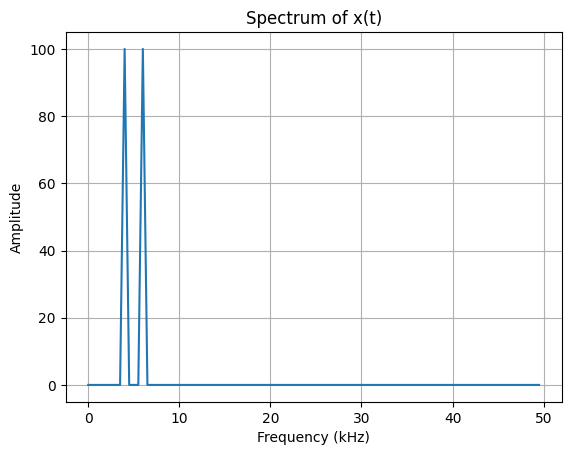

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs_analog = 100e3  # 100 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
t_end = 2e-3  # 2 ms

# Time vector
t = np.arange(0, t_end, 1/fs_analog)

# Analog signal
x_t = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# FFT to compute the spectrum
n = len(t)
freqs = np.fft.fftfreq(n, d=1/fs_analog)
spectrum = np.fft.fft(x_t)

# Plotting
plt.figure()
plt.plot(freqs[:n // 2] / 1e3, np.abs(spectrum[:n // 2]))
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of x(t)')
plt.grid(True)
plt.savefig('fig/ex1_a_plot.png')
plt.show()


b) Due to sampling frequency shifted versions of the analogue spectrum are generated.

Draw the spectra shifted by $-f_{s}, 0$ and $+f_{s}$ and then the spectrum for $x[n]$ as a result of spectral addition in one diagram. The diagram should show the spectra in the range from $-f_{s}$ to $+f_{s}$.

Hint: Draw real and imaginary parts of the spectrum rather than magnitude and phase to ease addition.


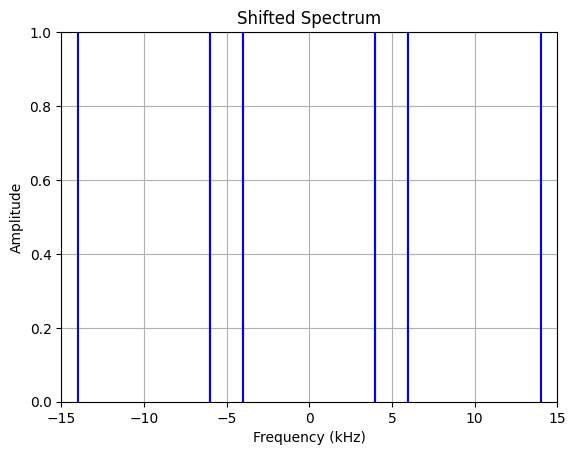

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 10e3  # 10 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
frequencies = np.array([f1, f2])

# Spectrum shifting
def plot_shifted_spectrum(frequencies, fs):
    # Shift frequencies for -fs, 0, and +fs
    shifts = [-fs, 0, fs]
    shifted_freqs = [frequencies + s for s in shifts]

    plt.figure()
    for s_freqs, s in zip(shifted_freqs, shifts):
        for freq in s_freqs:
            plt.axvline(x=freq / 1e3, linestyle='-', color='b')
            plt.axvline(x=-freq / 1e3, linestyle='-', color='b')

    plt.xlabel('Frequency (kHz)')
    plt.ylabel('Amplitude')
    plt.title('Shifted Spectrum')
    plt.grid(True)
    plt.xlim(-15, 15)  # From -15 kHz to 15 kHz
    plt.savefig('fig/ex1_b_plot.png')
    plt.show()

# Plot the shifted spectrum
plot_shifted_spectrum(frequencies, fs)


c) In Matlab plot the section 0 to $2 \mathrm{~ms}$ of the signal $x(t)$ with a sampling rate of $100 \mathrm{kHz}$ to emulate an analogue signal.

Then also add the sampled signal $x[n]=x\left(n T_{s}\right)$ to the same plot. Show that $x[n]$ corresponds to the spectrum derived in b).


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_46314/1155644681.py:24: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n * 1e3 / fs, x_n, linefmt='r', markerfmt='ro', basefmt=' ', label='Sampled signal x[n]', use_line_collection=True)


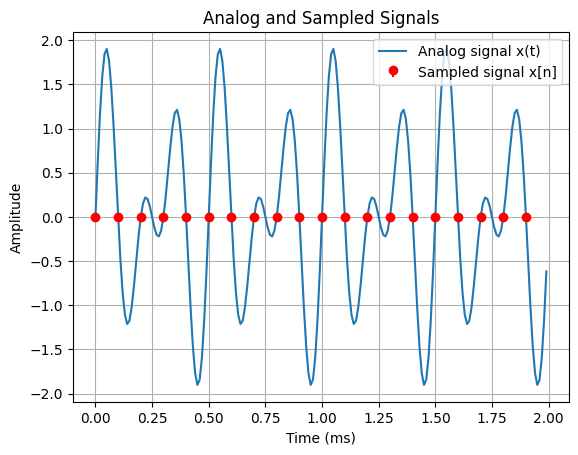

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs_analog = 100e3  # 100 kHz
fs = 10e3  # 10 kHz
f1 = 4e3  # 4 kHz
f2 = 6e3  # 6 kHz
t_end = 2e-3  # 2 ms

# Time vectors
t = np.arange(0, t_end, 1/fs_analog)
n = np.arange(0, int(t_end * fs))

# Analog signal
x_t = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)

# Sampled signal
x_n = np.sin(2 * np.pi * f1 * n / fs) + np.sin(2 * np.pi * f2 * n / fs)

# Plotting
plt.figure()
plt.plot(t * 1e3, x_t, label='Analog signal x(t)')
plt.stem(n * 1e3 / fs, x_n, linefmt='r', markerfmt='ro', basefmt=' ', label='Sampled signal x[n]', use_line_collection=True)
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.title('Analog and Sampled Signals')
plt.legend()
plt.grid(True)
plt.savefig('fig/ex1_c_plot.png')
plt.show()

## Exercise 2 Sampling 2 (25\%)

The spectrum $X(f)$ of an analogue signal $x(t)$ is given with:
![](https://cdn.mathpix.com/cropped/2024_05_02_cce32ce20ed068e88e62g-1.jpg?height=388&width=580&top_left_y=2076&top_left_x=656)

a) Draw the real and imaginary parts of the spectrum $X(f)$.

/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_46314/589787637.py:19: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies / 1e3, magnitude, use_line_collection=True)
/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_46314/589787637.py:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(frequencies / 1e3, phase, use_line_collection=True)


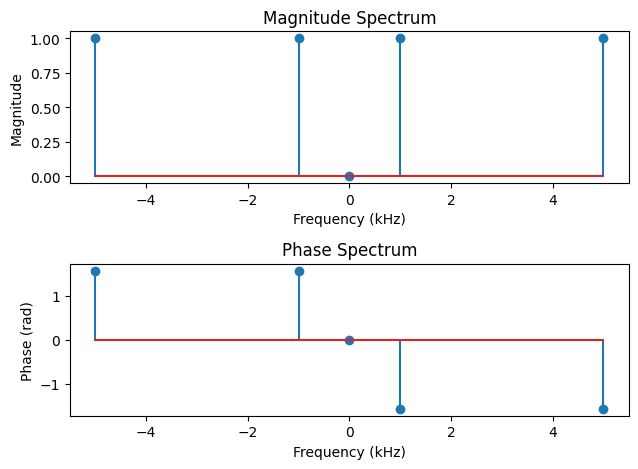

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
fs = 8e3  # Sampling frequency in Hz

# Create frequencies from the image
frequencies = np.array([-5e3, -1e3, 0, 1e3, 5e3])  # Frequencies in Hz

# Magnitude values from the image (normalized)
magnitude = np.array([1, 1, 0, 1, 1])

# Phase values from the image
phase = np.array([np.pi / 2, np.pi / 2, 0, -np.pi / 2, -np.pi / 2])

# Plot magnitude and phase
plt.figure()
plt.subplot(2, 1, 1)
plt.stem(frequencies / 1e3, magnitude, use_line_collection=True)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')

plt.subplot(2, 1, 2)
plt.stem(frequencies / 1e3, phase, use_line_collection=True)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Phase (rad)')
plt.title('Phase Spectrum')

plt.tight_layout()
plt.savefig('fig/ex2_a_plot.png')
plt.show()


b) $x(t)$ is sampled with $8 \mathrm{kHz}$ to yield the discrete time signal $x[n]$. Draw the spectrum of $x[n]$ from $-f_{s}$ to $f_{s}$ and indicate the baseband.


/var/folders/bt/2nhmyw717njc3db3_54g8yb80000gn/T/ipykernel_46314/1730075856.py:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(shifted_freqs / 1e3, magnitude, use_line_collection=True, basefmt=" ")


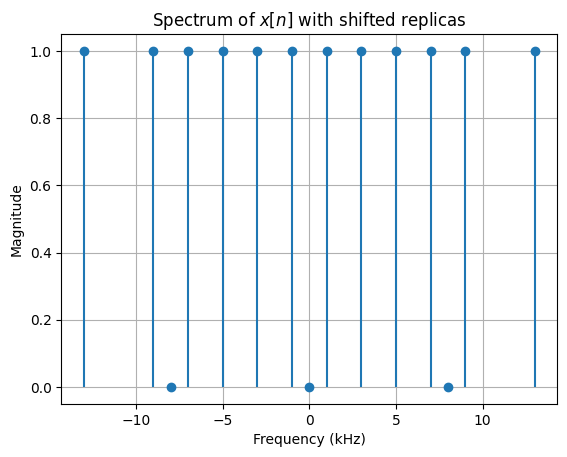

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
fs = 8e3  # Sampling frequency in Hz
frequencies = np.array([-5e3, -1e3, 0, 1e3, 5e3])  # Frequencies in Hz

# Magnitude values from the image (normalized)
magnitude = np.array([1, 1, 0, 1, 1])

# Number of shifted spectra
shifts = [-fs, 0, fs]

# Plot shifted spectra
plt.figure()
for shift in shifts:
    shifted_freqs = frequencies + shift
    plt.stem(shifted_freqs / 1e3, magnitude, use_line_collection=True, basefmt=" ")

plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of $x[n]$ with shifted replicas')
plt.grid(True)
plt.savefig('fig/ex2_b_plot.png')
plt.show()


## Exercise 3 Reconstruction (35\%)

The discrete time signal $x[n]=\sqrt{2} \cdot \sin \left(2 \pi \cdot \frac{1}{8} \cdot n\right)$ is converted to the analogue signal $x(t)$ with an DAC which uses a clock frequency of $8 \mathrm{kHz}$ and which converts a numerical value of 1 to $1 \mathrm{~V}$.

a) Up to $20 \mathrm{kHz}$, list all positive frequencies which occur (in general) in $x(t)$.


**Answer:**
- The positive frequencies are $f_0, 2f_0, \ldots, n f_0 $ where $ f_0 = 1 \mathrm{kHz} $.


b) The DAC implements a zero-order hold reconstruction.

1. What is the power (in $\mathrm{dB}$ ) of the baseband sinewave (the sine at the lowest frequency).
2. What is the power (in $\mathrm{dB}$ ) of the first out-of-band sinewave (the sine with the second lowest frequency).


c) Qualitatively draw the spectrum of $x(t)$ up to $20 \mathrm{kHz}$. Delta pulses should be drawn with an arrow, the height of the arrow should indicate the weight of the delta-pulse.

Hints:

- The power of a sinewave with amplitude $A$ is $P=\frac{A^{2}}{2}$ (also see Parseval's theorem for periodic signals DSP_02/27).
- The impulse response of a 0 -order reconstruction filter is a rectangular pulse, its frequency response is thus given in $D S P_{-} 02 / 43$.
- When calculating the attenuation for the respective frequencies it should be noted that e.g. Matlab uses the normalized sinc function.



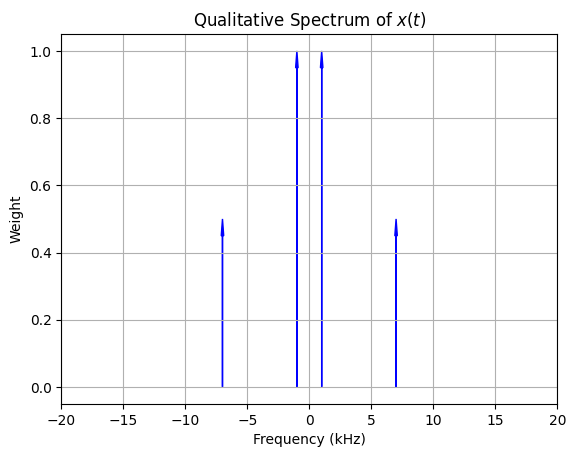

In [8]:
import matplotlib.pyplot as plt

# Set up frequency range
fs = 8e3  # Sampling frequency
frequencies = [1e3, fs - 1e3]  # Example frequencies
weights = [1, 0.5]  # Example weights

# Plot spectrum
plt.figure()
for f, w in zip(frequencies, weights):
    plt.arrow(f / 1e3, 0, 0, w, head_width=0.2, head_length=0.05, color='blue', length_includes_head=True)
    plt.arrow(-f / 1e3, 0, 0, w, head_width=0.2, head_length=0.05, color='blue', length_includes_head=True)

plt.xlim(-20, 20)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Weight')
plt.title('Qualitative Spectrum of $x(t)$')
plt.grid(True)
plt.savefig('fig/ex3_c_plot')
plt.show()


## Exercise 4 Signal Processing Onramp - BONUS (15\%)

This task is optional (additional 15\%) and should help you to learn the basics of practical signal processing techniques in MATLAB. You will find out how to use spectral analysis and filtering for preprocessing, analyzing and extracting information from signal data.

For that you need to carry out the full 'Signal Processing Onramp course' [1]. For getting the bonus points you need to add the certificate to your protocol (you can download a pdf - see 'Share Certificate and Progress'). Also, you need to share your progress with my account (matthias.wagner@jku.at), what can be done in the same tab.

[1] https://matlabacademy.mathworks.com/details/signal-processing-onramp/signalprocessing

